In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stations = [
    'sakashita',
    'ochiaigawa',
    'nakatsugawa',
    'minosakamoto',
    'ena',
    'takenami',
    'kamado',
    'mizunami',
    'tokishi',
    'tajimi',
    'kokoke',
    'jokoji',
    'kozoji',
    'jinryo',
    'kasugai',
    'kachigawa',
    'shinmoriyama',
    'ozone',
    'chikusa',
    'tsurumai',
    'kanayama',
    'nagoya'
]

In [3]:
place_types = [
    'art_gallery',
    'bakery',
    'bar',
    'beauty_salon',
    'book_store',
    'cafe',
    'car_rental',
    'city_hall',
    'clothing_store',
    'convenience_store',
    'department_store',
    'doctor',
    'electronics_store',
    'florist',
    'gym',
    'hair_care',
    'home_goods_store',
    'hospital',
    'library',
    'liquor_store',
    'local_government_office',
    'lodging', #ホテル
    'meal_delivery',
    'meal_takeaway',
    'movie_theater',
    'night_club',
    'park',
    'parking',
    'resaurant',
    'school',
    'shopping_mall',
    'spa',
    'store',
    'university'
]

In [4]:
station_panel = pd.Panel(items=stations, major_axis=range(61), minor_axis=place_types)
for i, station in enumerate(stations):
    station_df = pd.read_csv('input/'+station+'500.csv', index_col=0)
    station_panel[station] = station_df.iloc[:, 0::1]

In [5]:
p_count = pd.DataFrame(index=place_types, columns=stations)
for i, station in enumerate(stations):
    place_count = station_panel[station].shape[0] - station_panel[station].isnull().sum()
    p_count.iloc[:, i] = place_count

In [6]:
#mean = []
#for i in range(p_count.shape[0]):
#    mean.append(np.mean(p_count.iloc[i, :].values))
#mean = pd.Series(data=mean, name='mean', index=place_types)
#p_count = pd.concat([p_count, mean], axis=1)

#total = []
#total_ind = stations[:]
#total_ind.append('mean')
#for i in range(p_count.shape[1]):
#    total.append(np.sum(p_count.iloc[:, i].values))
#p_count.loc['total'] = total
#p_count

In [7]:
station_panel = pd.Panel(items=stations, major_axis=range(61), minor_axis=place_types)
for i, station in enumerate(stations):
    station_df = pd.read_csv('input/'+station+'500.csv', index_col=0)
    station_df = station_df.iloc[:, 1::2]
    station_df.columns = place_types
    station_panel[station] = station_df

In [8]:
r_count = pd.DataFrame(index=place_types, columns=stations)
for i, station in enumerate(stations):
    rating_count = station_panel[station].astype(float).describe().T.iloc[:, 0].values
    r_count.iloc[:, i] = rating_count

r_mean = pd.DataFrame(index=place_types, columns=stations)
for i, station in enumerate(stations):
    rating_mean = station_panel[station].astype(float).describe().T.iloc[:, 1].values
    r_mean.iloc[:, i] = rating_mean

r_std = pd.DataFrame(index=place_types, columns=stations)
for i, station in enumerate(stations):
    rating_std = station_panel[station].astype(float).describe().T.iloc[:, 2].values
    r_std.iloc[:, i] = rating_std

In [9]:
r_rate = r_count/p_count

# 名古屋から遠い順

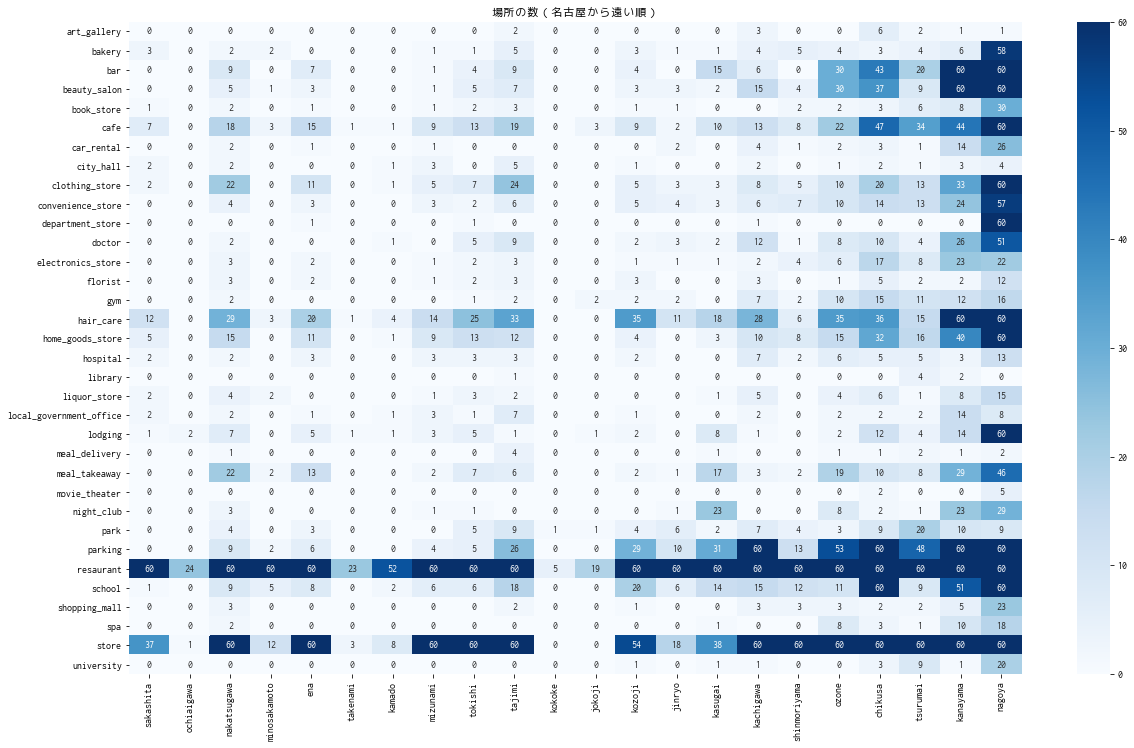

In [10]:
plt.figure(figsize=(20,12))
plt.title('場所の数（名古屋から遠い順）')
sns.heatmap(p_count, annot=True, cmap='Blues')
plt.savefig('output/place_count.png')

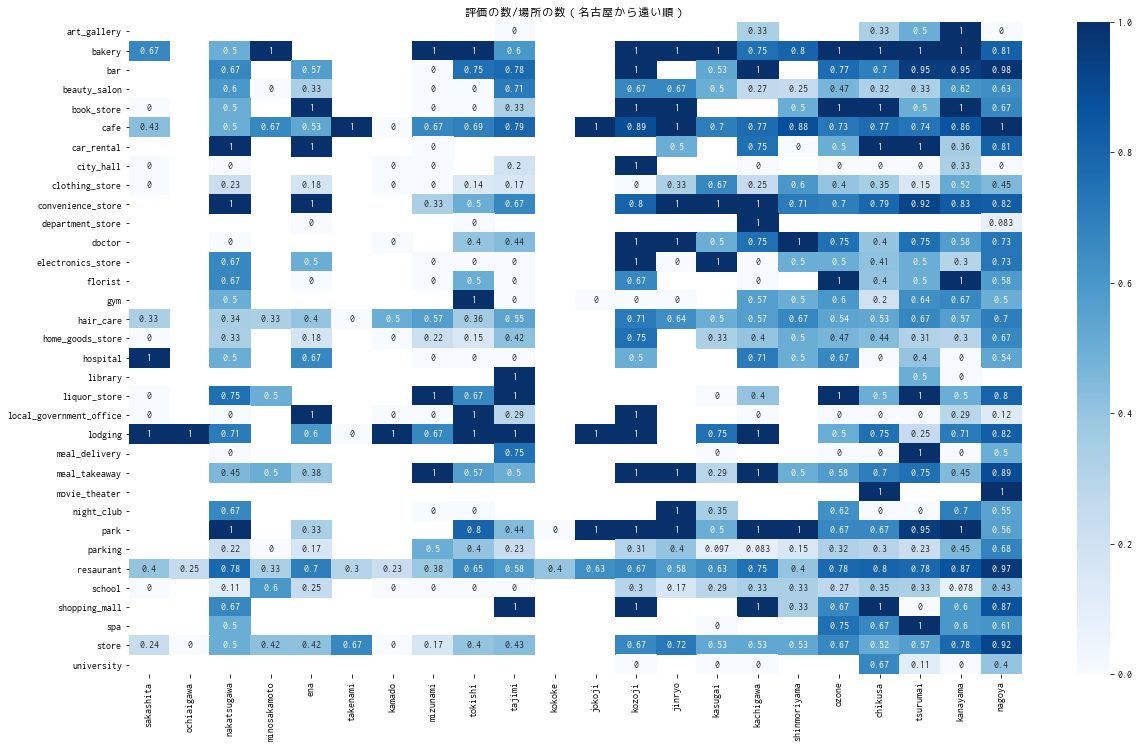

In [11]:
plt.figure(figsize=(20,12))
plt.title('評価の数/場所の数（名古屋から遠い順）')
sns.heatmap(r_rate, annot=True, cmap='Blues')
plt.savefig('output/rating_rate.png')

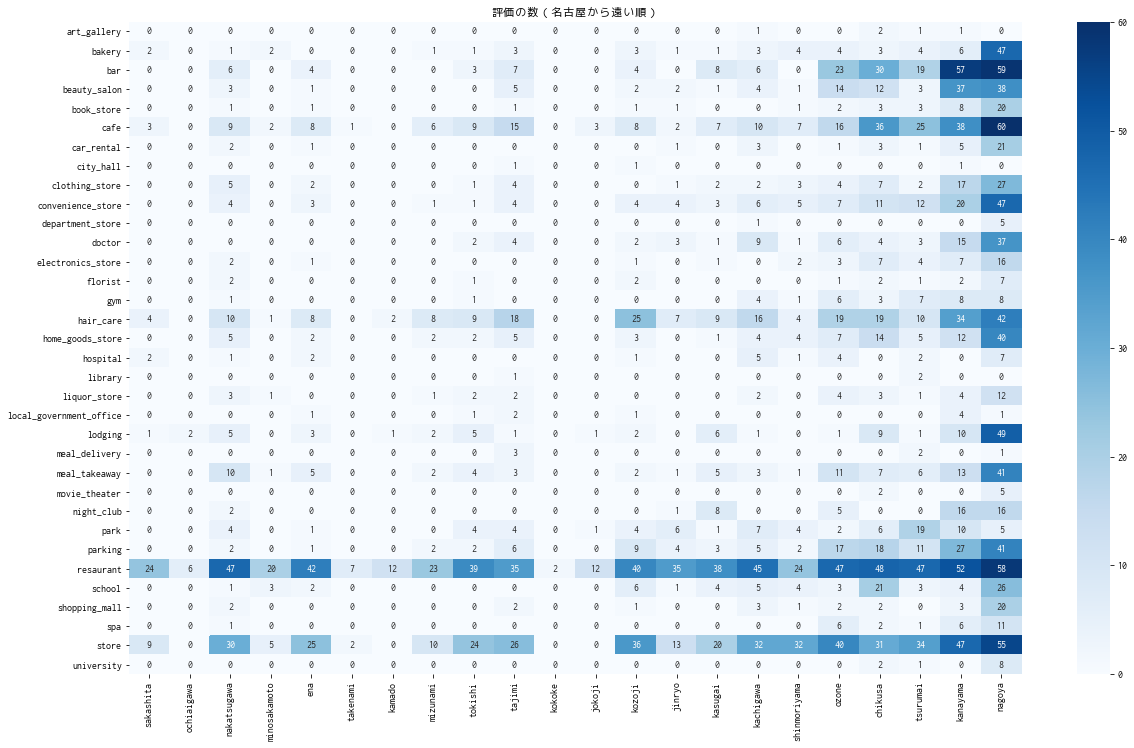

In [12]:
plt.figure(figsize=(20,12))
plt.title('評価の数（名古屋から遠い順）')
sns.heatmap(r_count, annot=True, cmap='Blues')
plt.savefig('output/rating_count.png')

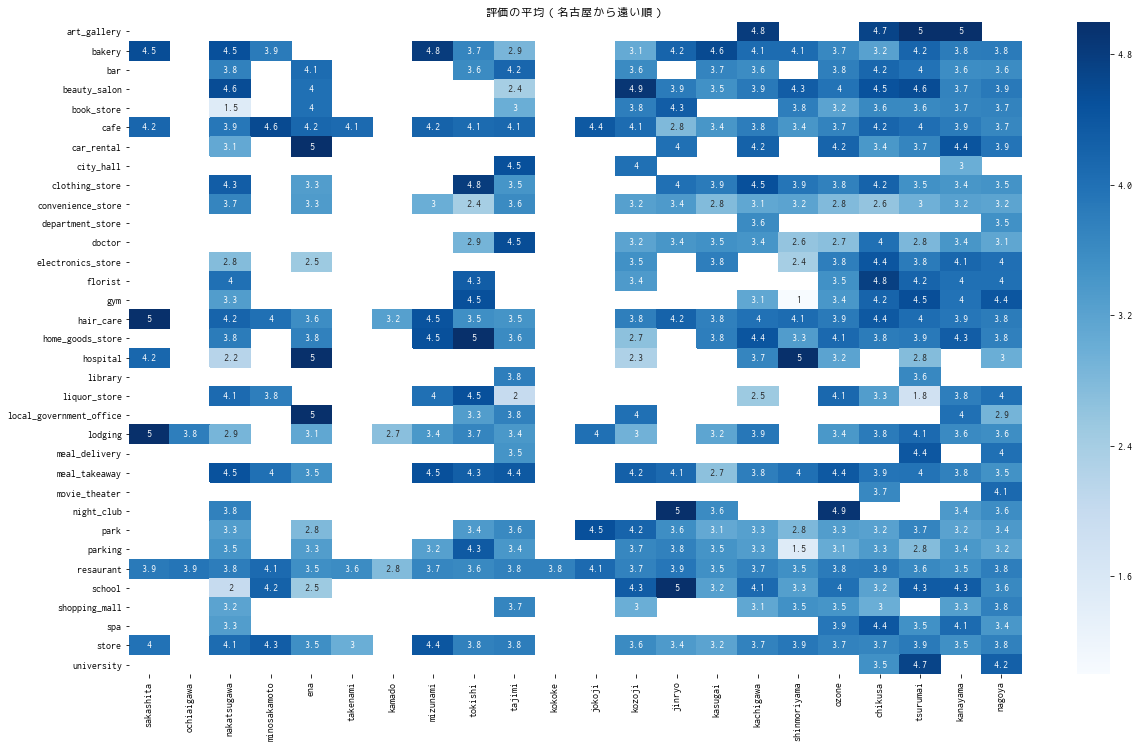

In [13]:
plt.figure(figsize=(20,12))
plt.title('評価の平均（名古屋から遠い順）')
sns.heatmap(r_mean, annot=True, cmap='Blues')
plt.savefig('output/rating_mean.png')

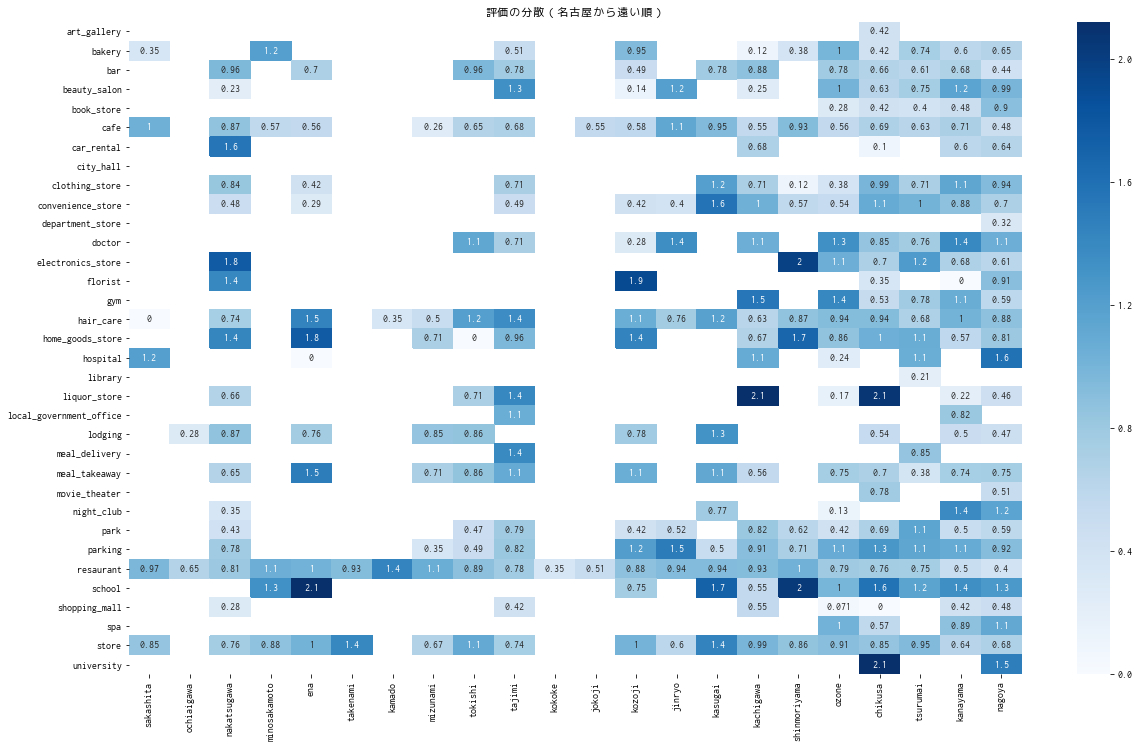

In [14]:
plt.figure(figsize=(20,12))
plt.title('評価の分散（名古屋から遠い順）')
sns.heatmap(r_std, annot=True, cmap='Blues')
plt.savefig('output/rating_std.png')

# 乗降客の少ない順

In [15]:
info = pd.read_csv('input/station_edited_data.csv', index_col=0)

In [16]:
#info

In [17]:
#info.sort_values(by='乗降客数（日）', axis=1).columns

In [27]:
p_count = pd.concat([p_count, info], axis=0)
r_rate = pd.concat([r_rate, info], axis=0)
r_count = pd.concat([r_count, info], axis=0)
r_mean = pd.concat([r_mean, info], axis=0)
r_std = pd.concat([r_std, info], axis=0)

In [19]:
#p_count

In [28]:
p_count = p_count.sort_values(by='乗降客数（日）', axis=1)
r_rate = r_rate.sort_values(by='乗降客数（日）', axis=1)
r_count = r_count.sort_values(by='乗降客数（日）', axis=1)
r_mean = r_mean.sort_values(by='乗降客数（日）', axis=1)
r_std = r_std.sort_values(by='乗降客数（日）', axis=1)

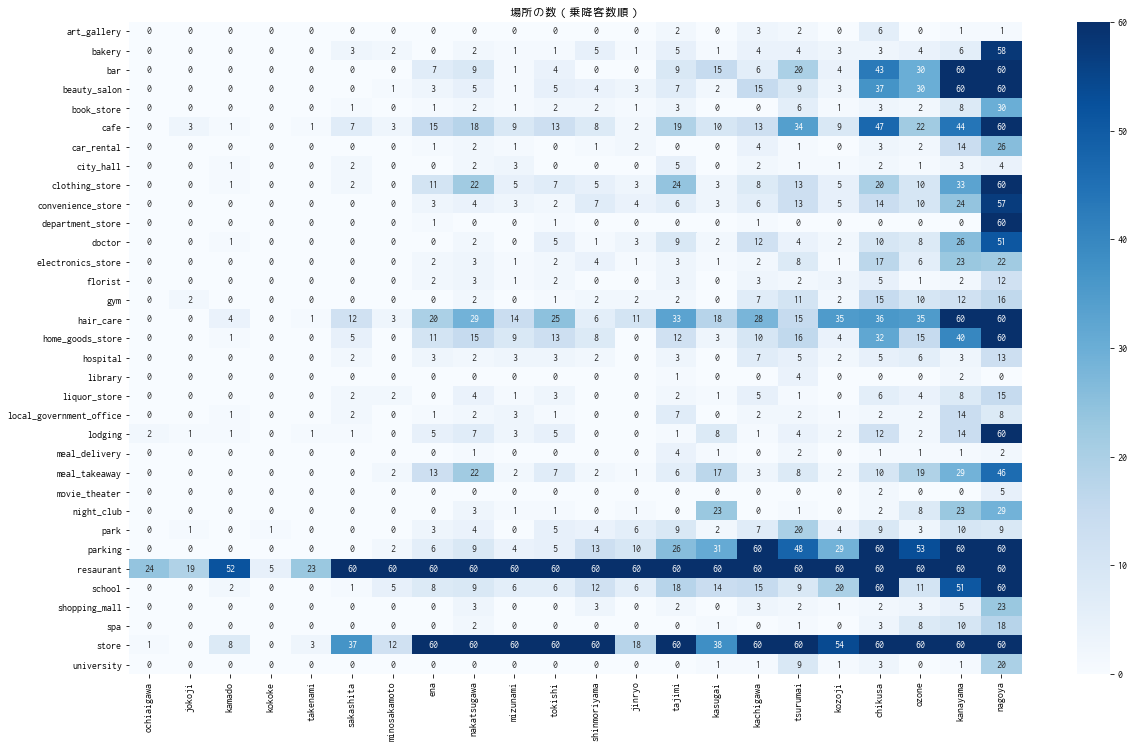

In [29]:
plt.figure(figsize=(20,12))
plt.title('場所の数（乗降客数順）')
sns.heatmap(p_count[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/place_count_jokokyaku.png')

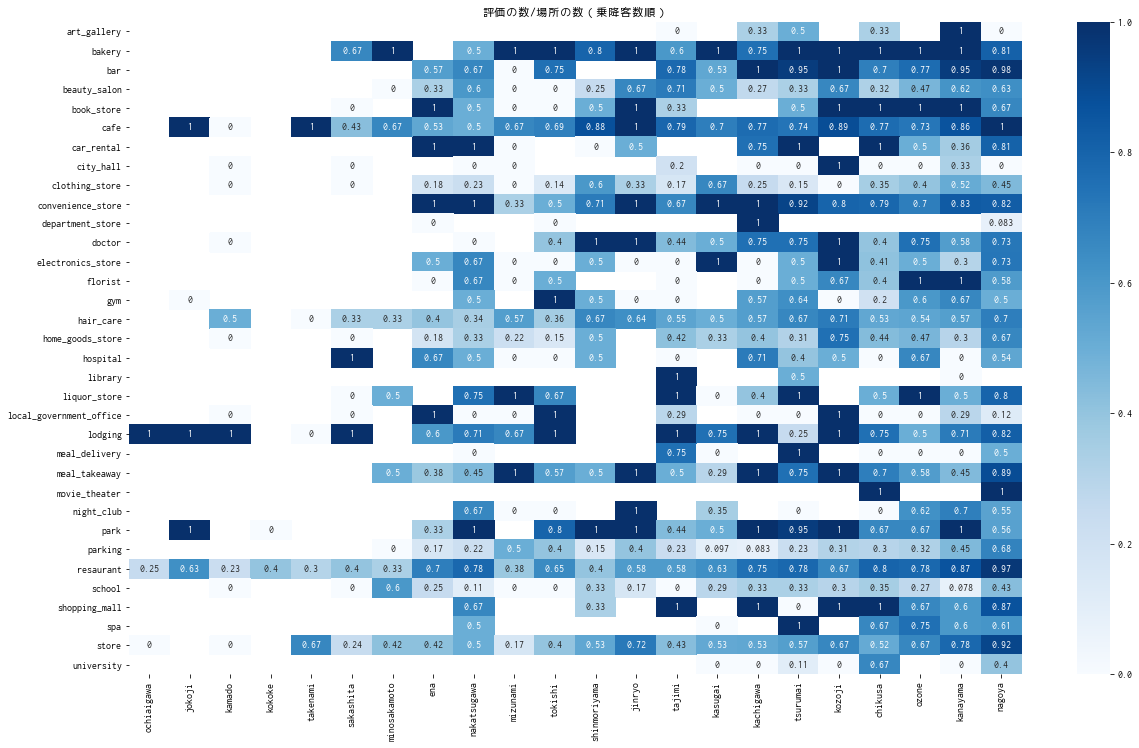

In [31]:
plt.figure(figsize=(20,12))
plt.title('評価の数/場所の数（乗降客数順）')
sns.heatmap(r_rate[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/rating_rate_jokokyaku.png')

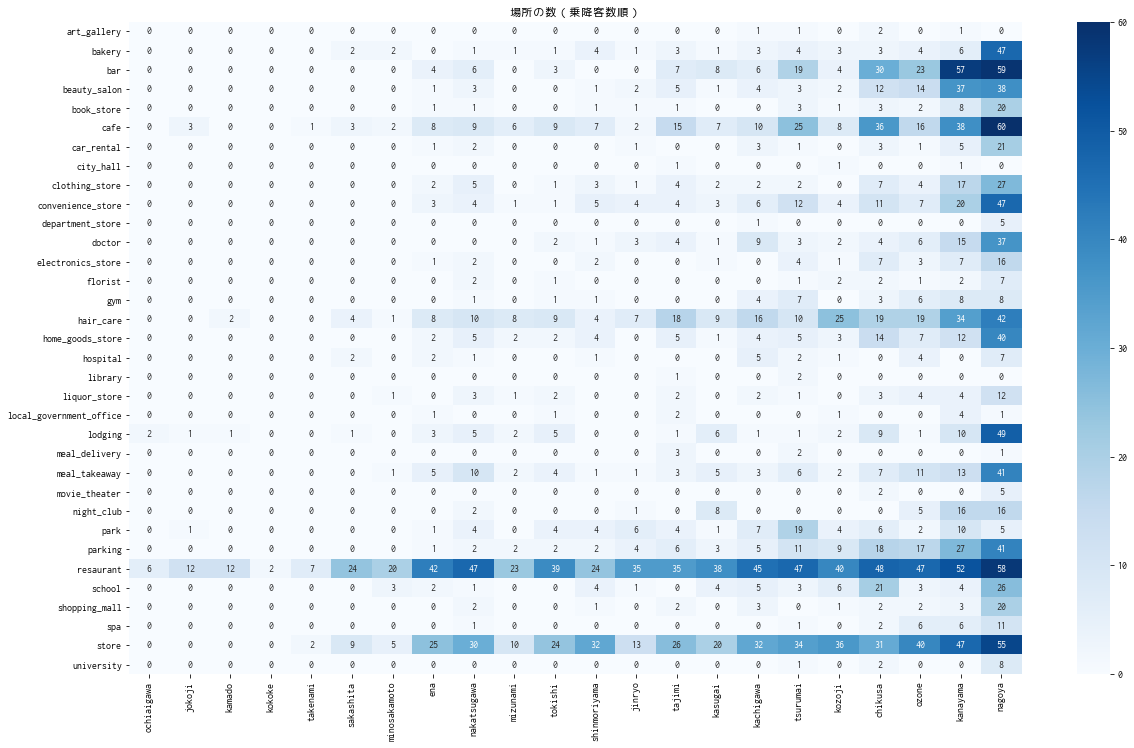

In [24]:
plt.figure(figsize=(20,12))
plt.title('評価の数（乗降客数順）')
sns.heatmap(r_count[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/rating_count_jokokyaku.png')

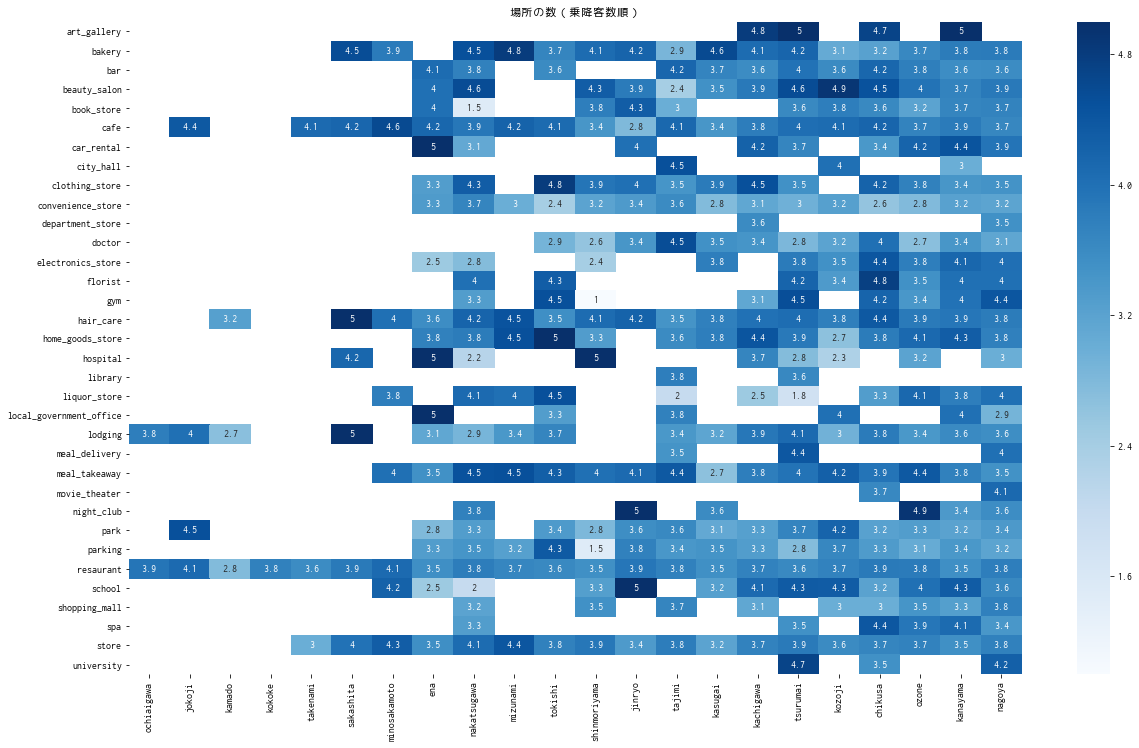

In [25]:
plt.figure(figsize=(20,12))
plt.title('評価の平均（乗降客数順）')
sns.heatmap(r_mean[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/rating_mean_jokokyaku.png')

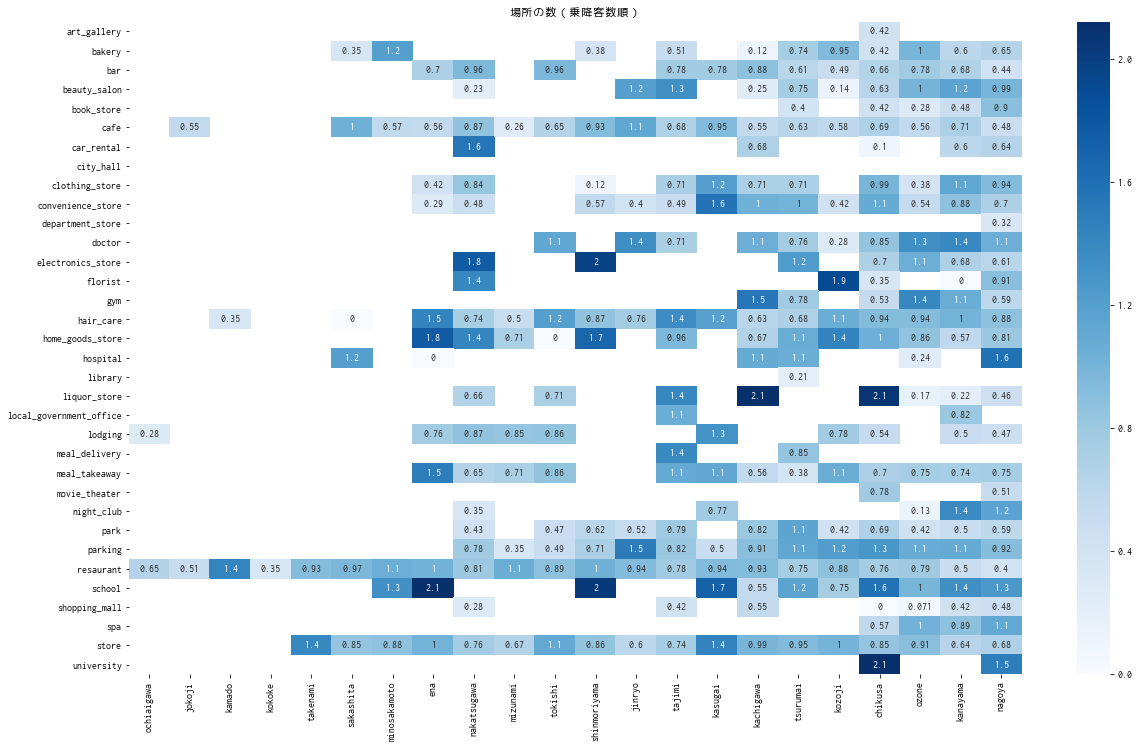

In [26]:
plt.figure(figsize=(20,12))
plt.title('評価の分散（乗降客数順）')
sns.heatmap(r_std[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/rating_std_jokokyaku.png')

# 人口総数の少ない順

In [32]:
p_count = p_count.sort_values(by='人口総数', axis=1)
r_rate = r_rate.sort_values(by='人口総数', axis=1)
r_count = r_count.sort_values(by='人口総数', axis=1)
r_mean = r_mean.sort_values(by='人口総数', axis=1)
r_std = r_std.sort_values(by='人口総数', axis=1)

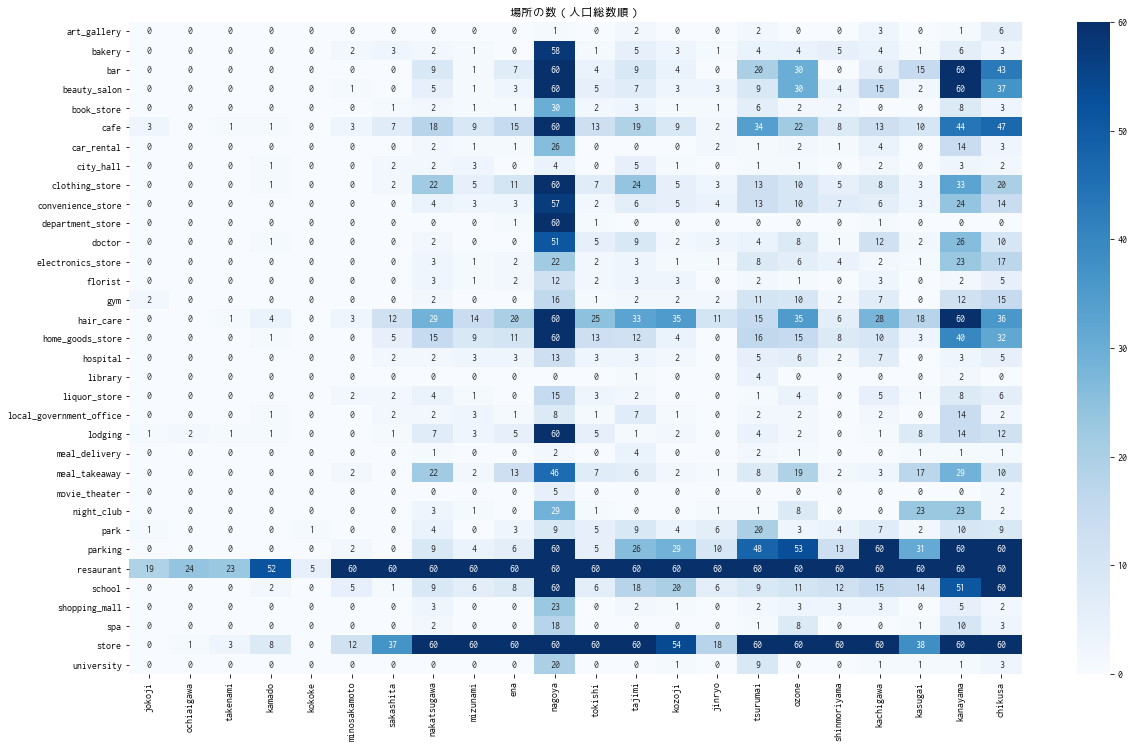

In [33]:
plt.figure(figsize=(20,12))
plt.title('場所の数（人口総数順）')
sns.heatmap(p_count[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/place_count_jinkososu.png')

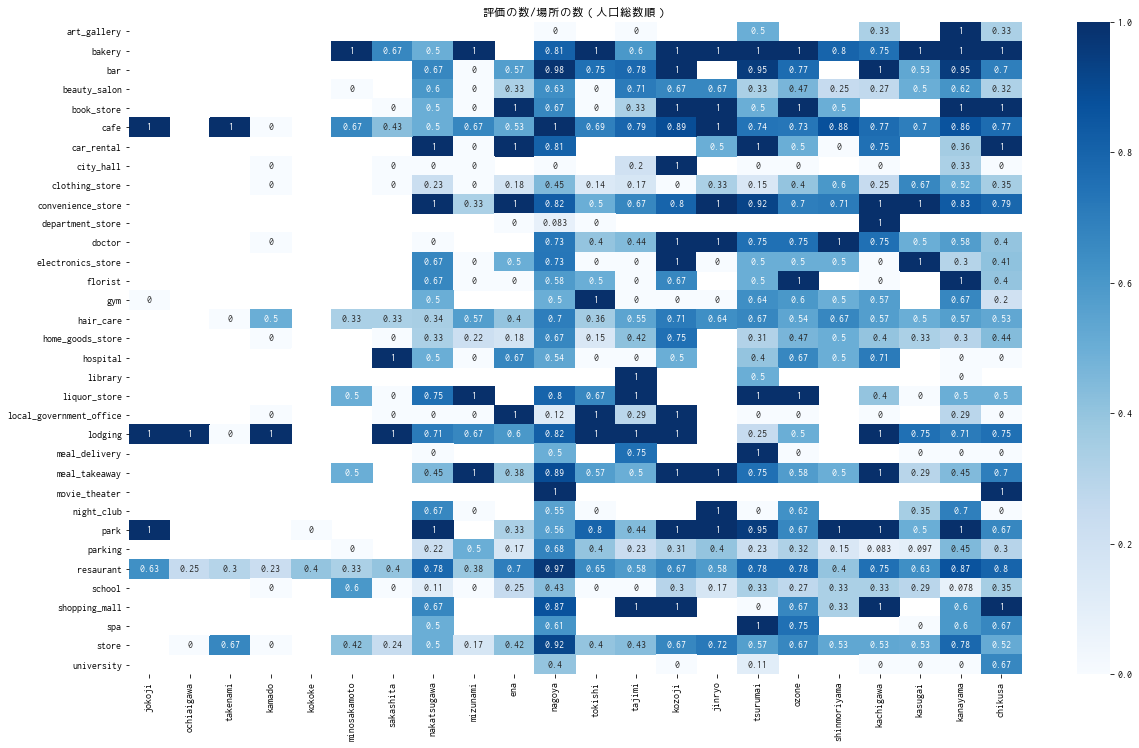

In [34]:
plt.figure(figsize=(20,12))
plt.title('評価の数/場所の数（人口総数順）')
sns.heatmap(r_rate[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/rating_rate_jinkososu.png')

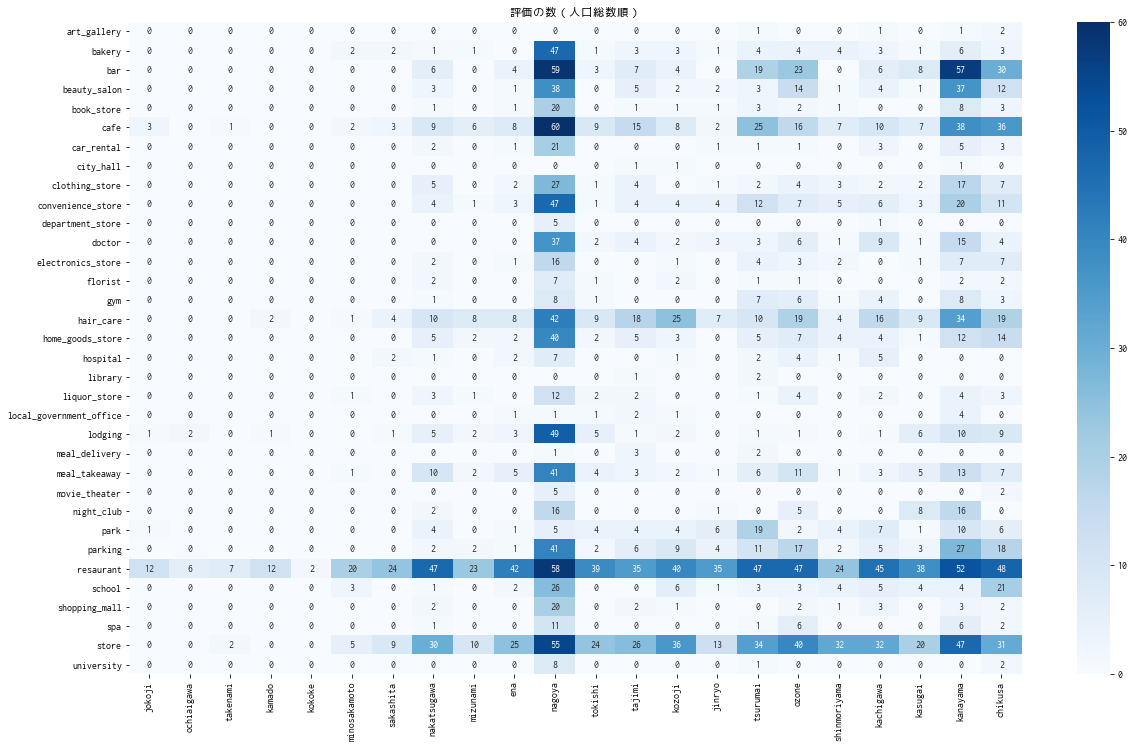

In [35]:
plt.figure(figsize=(20,12))
plt.title('評価の数（人口総数順）')
sns.heatmap(r_count[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/rating_count_jinkososu.png')

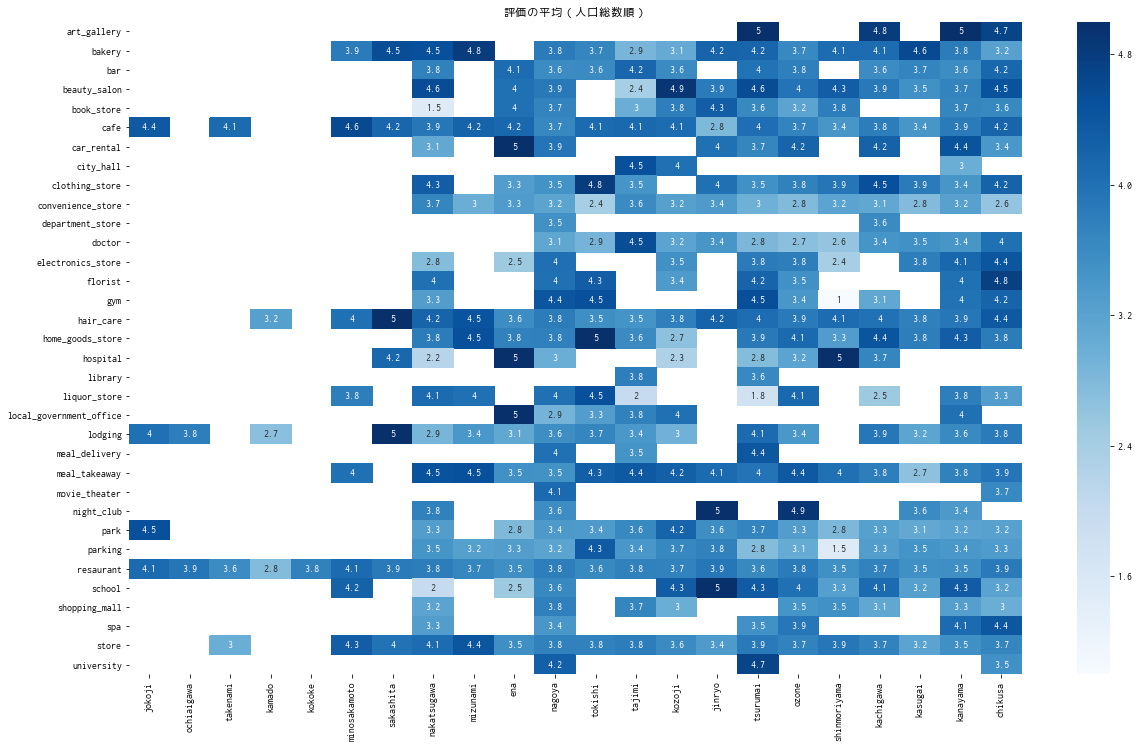

In [36]:
plt.figure(figsize=(20,12))
plt.title('評価の平均（人口総数順）')
sns.heatmap(r_mean[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/rating_mean_jinkososu.png')

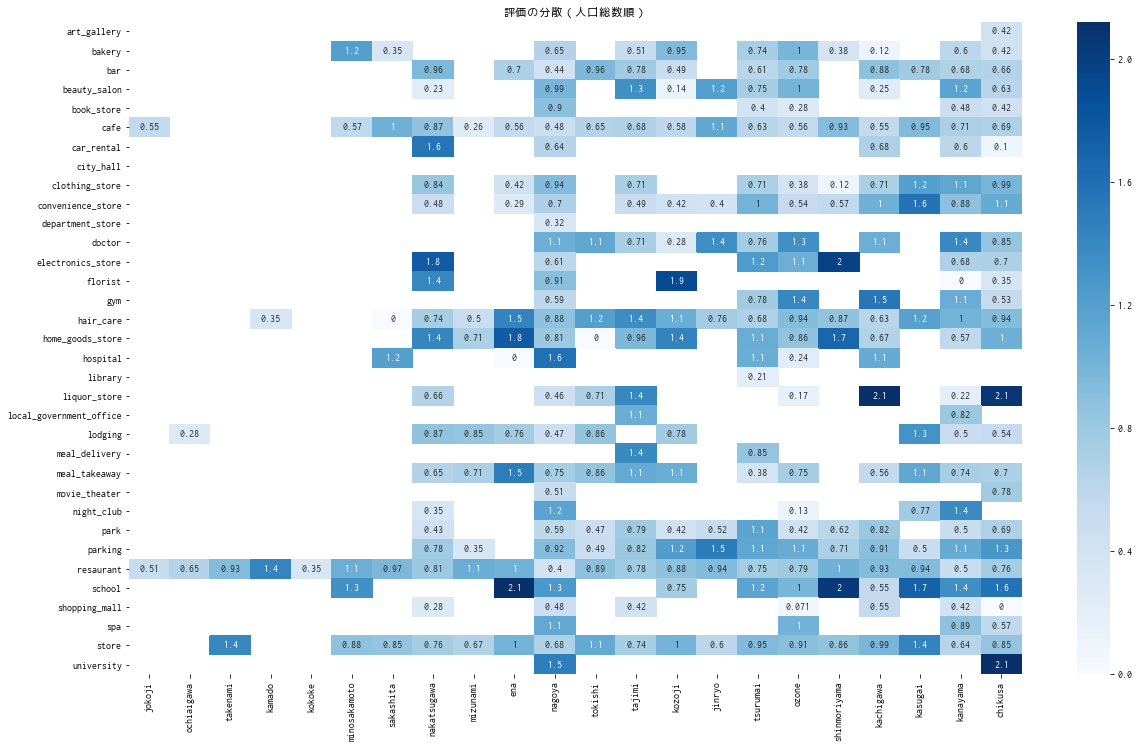

In [37]:
plt.figure(figsize=(20,12))
plt.title('評価の分散（人口総数順）')
sns.heatmap(r_std[0:len(place_types)], annot=True, cmap='Blues')
plt.savefig('output/rating_std_jinkososu.png')